In [21]:
import keras

In [22]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [23]:
train_labels =[]
train_samples=[]

In [24]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [25]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [26]:
test_samples=[]
test_labels=[]

In [27]:
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    

In [28]:
test_samples=np.array(test_samples)
test_labels = np.array(test_labels)

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

C:\Users\rashid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

C:\Users\rashid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
scaled_train_samples.shape

(2100, 1)

In [32]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [33]:
model = Sequential([
    Dense(16, input_shape=(1,), activation = 'relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])


In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(scaled_train_samples, train_labels,validation_split=0.1,  batch_size=10, epochs=20, shuffle=True, verbose =2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6840 - acc: 0.6143 - val_loss: 0.6734 - val_acc: 0.6429
Epoch 2/20
 - 0s - loss: 0.6656 - acc: 0.6529 - val_loss: 0.6526 - val_acc: 0.6857
Epoch 3/20
 - 0s - loss: 0.6452 - acc: 0.6963 - val_loss: 0.6294 - val_acc: 0.6952
Epoch 4/20
 - 0s - loss: 0.6243 - acc: 0.7190 - val_loss: 0.6061 - val_acc: 0.7190
Epoch 5/20
 - 0s - loss: 0.6026 - acc: 0.7280 - val_loss: 0.5814 - val_acc: 0.7667
Epoch 6/20
 - 0s - loss: 0.5799 - acc: 0.7476 - val_loss: 0.5550 - val_acc: 0.7810
Epoch 7/20
 - 0s - loss: 0.5567 - acc: 0.7751 - val_loss: 0.5286 - val_acc: 0.7905
Epoch 8/20
 - 0s - loss: 0.5336 - acc: 0.7979 - val_loss: 0.5023 - val_acc: 0.8048
Epoch 9/20
 - 0s - loss: 0.5111 - acc: 0.8153 - val_loss: 0.4762 - val_acc: 0.8238
Epoch 10/20
 - 0s - loss: 0.4892 - acc: 0.8259 - val_loss: 0.4507 - val_acc: 0.8429
Epoch 11/20
 - 0s - loss: 0.4683 - acc: 0.8392 - val_loss: 0.4265 - val_acc: 0.8476
Epoch 12/20
 - 0s - loss: 0.4484 - acc

In [37]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [38]:
predictions

array([[0.7039628 , 0.29603723],
       [0.16743127, 0.83256876],
       [0.52939105, 0.47060892],
       ...,
       [0.0677581 , 0.93224186],
       [0.49199867, 0.50800127],
       [0.12150946, 0.87849057]], dtype=float32)

In [39]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [41]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [42]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [43]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("NCM")
    else:
        print("CMWN")
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

CMWN
[[ 916  134]
 [  42 1008]]


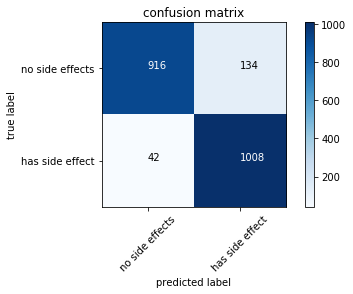

In [44]:
cm_plot_labels =['no side effects', 'has side effect']
plot_confusion_matrix(cm, cm_plot_labels, title='confusion matrix')

Convolutional Neural Networks in Keras

In [46]:
import os
os.chdir(r"C:\Users\rashid\Desktop\cat_and_dogs")

In [48]:
"C:\Users\rashid\Desktop\cat_and_dogs"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-48-1ab3a010cf4b>, line 1)

In [49]:
train_path = "C:/Users/rashid/Desktop/cat_and_dogs/train/"
test_path = "C:/Users/rashid/Desktop/cat_and_dogs/test/"
valid_path = "C:/Users/rashid/Desktop/cat_and_dogs/valid/"

In [50]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [54]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose(0,2,3,1)
        f = plt.figure(figsize=figsize)
        cols= len(ims//rows if len(ims)%2==0 else len(ims)//rows+1)
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation= None if interp else 'none')

In [55]:
imgs, labels = next(train_batches)

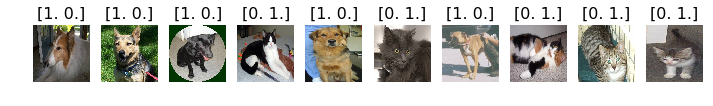

In [56]:
plots(imgs, titles=labels)

In [57]:
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import itertools 
%matplotlib inline

In [58]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax')
])

In [59]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data = valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 1s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


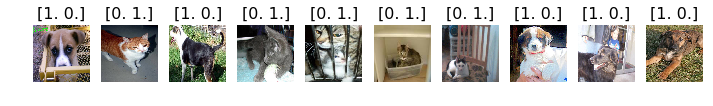

In [70]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [94]:
test_labels = test_labels[:, 0]

In [100]:
test_labels

array([1., 1., 0., 1., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [101]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [102]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [105]:
cm = confusion_matrix(test_labels, predictions[:, 0])
cm

array([[4, 0],
       [6, 0]], dtype=int64)

In [106]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("NCM")
    else:
        print("CMWN")
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

CMWN
[[4 0]
 [6 0]]


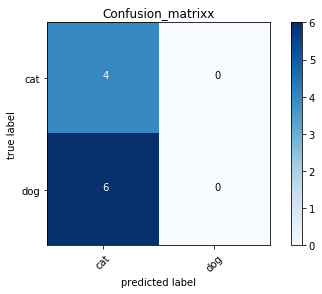

In [107]:
cm_plot_labels=['cat', 'dog']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion_matrixx')

In [164]:
vgg16_model =keras.applications.vgg16.VGG16()

In [165]:
vgg16_model.layers.pop()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [166]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [167]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [159]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [168]:
for layer in model.layers:
    layer.trainable=False

In [169]:
model.add(Dense(2, activation='relu'))

In [170]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [171]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [185]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches,  validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 43s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 2/5
 - 42s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 3/5
 - 43s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 4/5
 - 43s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000
Epoch 5/5
 - 40s - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000


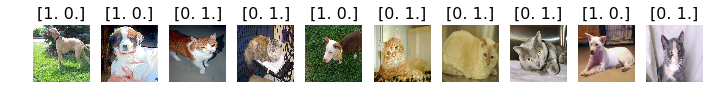

In [186]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [187]:
test_labels = test_labels[:, 0]

In [188]:
test_labels

array([1., 1., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [189]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [190]:
predictions

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

DATA AUGEMENTATION
Data augumentation occurs when you create new data based on your existing data 

In [191]:
from scipy import misc, ndimage


In [192]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose(0,2,3,1)
        f = plt.figure(figsize=figsize)
        cols= len(ims//rows if len(ims)%2==0 else len(ims)//rows+1)
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[i], interpolation= None if interp else 'none')

In [196]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,channel_shift_range=10,
                        horizontal_flip=True)

In [197]:
image_path = "C:/Users/rashid/Desktop/cat_and_dogs/test/dog/10003.jpg"

C:\Users\rashid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


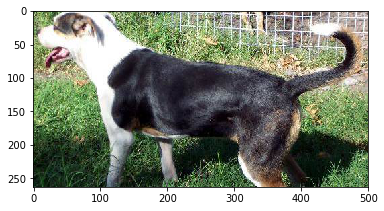

In [202]:
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [203]:
aug_iter = gen.flow(image)

In [207]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

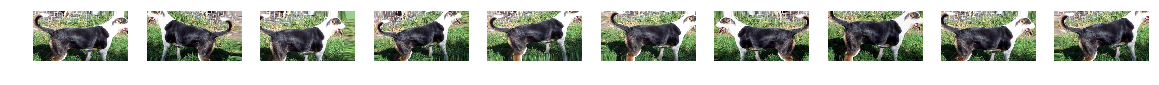

In [209]:
plots(aug_images, figsize=(20,7), rows=2)